In [39]:
import pandas as pd

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
import re


In [40]:
df0 =pd.read_csv("property_listing_data_in_Bangladesh.csv")
df0.head()


,title,beds,bath,area,adress,type,purpose,flooPlan,url,lastUpdated,price
0,Eminent Apartment Of 2200 Sq Ft Is Vacant For ...,3,4,"2,200 sqft","Block A, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"August 13, 2022",50 Thousand
1,"Apartment Ready To Rent In South Khulshi, Near...",3,4,"1,400 sqft","South Khulshi, Khulshi, Chattogram",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/44...,https://www.bproperty.com/en/property/details-...,"January 25, 2022",30 Thousand
2,"Smartly priced 1950 SQ FT apartment, that you ...",3,4,"1,950 sqft","Block F, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/11...,https://www.bproperty.com/en/property/details-...,"February 22, 2023",30 Thousand
3,2000 Sq Ft Residential Apartment Is Up For Ren...,3,3,"2,000 sqft","Sector 9, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/14...,https://www.bproperty.com/en/property/details-...,"October 28, 2021",35 Thousand
4,Strongly Structured This 1650 Sq. ft Apartment...,3,4,"1,650 sqft","Block I, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"February 19, 2023",25 Thousand


In [41]:
def convert_price_to_number(price):
    if pd.isna(price):  # Handle NaN values
        return None
    if not isinstance(price, str):  # To ensure price is treated as a string
        price = str(price).strip()  # Strip spaces and ensure string format
    try:
        # Convert 'thousand' to *1000
        price = re.sub(r'(\d+(\.\d+)?)\s*thousand', 
                       lambda x: str(float(x.group(1)) * 1000), 
                       price.strip(), 
                       flags=re.IGNORECASE)
        # Convert 'lakh' to *100000
        price = re.sub(r'(\d+(\.\d+)?)\s*lakh', 
                       lambda x: str(float(x.group(1)) * 100000), 
                       price, 
                       flags=re.IGNORECASE)
        # Convert 'koti' to *10000000
        price = re.sub(r'(\d+(\.\d+)?)\s*koti', 
                       lambda x: str(float(x.group(1)) * 10000000), 
                       price, 
                       flags=re.IGNORECASE)
        
        # Convert to float
        return float(price)
    except Exception as e:
        print(f"Error converting price: {price}, error: {e}")
        return None






In [42]:
# Apply the function to the DataFrame
df0['price'] = df0['price'].apply(convert_price_to_number)


In [43]:
df0.head()


,title,beds,bath,area,adress,type,purpose,flooPlan,url,lastUpdated,price
0,Eminent Apartment Of 2200 Sq Ft Is Vacant For ...,3,4,"2,200 sqft","Block A, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"August 13, 2022",50000.0
1,"Apartment Ready To Rent In South Khulshi, Near...",3,4,"1,400 sqft","South Khulshi, Khulshi, Chattogram",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/44...,https://www.bproperty.com/en/property/details-...,"January 25, 2022",30000.0
2,"Smartly priced 1950 SQ FT apartment, that you ...",3,4,"1,950 sqft","Block F, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/11...,https://www.bproperty.com/en/property/details-...,"February 22, 2023",30000.0
3,2000 Sq Ft Residential Apartment Is Up For Ren...,3,3,"2,000 sqft","Sector 9, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/14...,https://www.bproperty.com/en/property/details-...,"October 28, 2021",35000.0
4,Strongly Structured This 1650 Sq. ft Apartment...,3,4,"1,650 sqft","Block I, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"February 19, 2023",25000.0


In [44]:
for price in df0['price'].head(10):
    print(f"Original: {price}")
    converted = convert_price_to_number(price)
    print(f"Converted: {converted}")


Original: 50000.0
Converted: 50000.0
Original: 30000.0
Converted: 30000.0
Original: 30000.0
Converted: 30000.0
Original: 35000.0
Converted: 35000.0
Original: 25000.0
Converted: 25000.0
Original: 110000.00000000001
Converted: 110000.00000000001
Original: 35000.0
Converted: 35000.0
Original: 23000.0
Converted: 23000.0
Original: 40000.0
Converted: 40000.0
Original: 23000.0
Converted: 23000.0


In [45]:
df0


,title,beds,bath,area,adress,type,purpose,flooPlan,url,lastUpdated,price
0,Eminent Apartment Of 2200 Sq Ft Is Vacant For ...,3,4,"2,200 sqft","Block A, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"August 13, 2022",50000.0
1,"Apartment Ready To Rent In South Khulshi, Near...",3,4,"1,400 sqft","South Khulshi, Khulshi, Chattogram",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/44...,https://www.bproperty.com/en/property/details-...,"January 25, 2022",30000.0
2,"Smartly priced 1950 SQ FT apartment, that you ...",3,4,"1,950 sqft","Block F, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/11...,https://www.bproperty.com/en/property/details-...,"February 22, 2023",30000.0
3,2000 Sq Ft Residential Apartment Is Up For Ren...,3,3,"2,000 sqft","Sector 9, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/14...,https://www.bproperty.com/en/property/details-...,"October 28, 2021",35000.0
4,Strongly Structured This 1650 Sq. ft Apartment...,3,4,"1,650 sqft","Block I, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"February 19, 2023",25000.0
...,...,...,...,...,...,...,...,...,...,...,...
7552,"Picture Yourself, Residing In This Well Constr...",4,4,"3,600 sqft","Sector 3, Uttara, Dhaka",Duplex,For Rent,https://images-cdn.bproperty.com/thumbnails/15...,https://www.bproperty.com/en/property/details-...,"February 7, 2023",80000.0
7553,Flat For Rent In Uttara Sector 13 Near Lubana ...,3,2,900 sqft,"Sector 13, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/15...,https://www.bproperty.com/en/property/details-...,"February 9, 2022",19000.0
7554,1000 SQ FT flat for rent in Uttara Sector 13 n...,2,2,"1,000 sqft","Sector 13, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/12...,https://www.bproperty.com/en/property/details-...,"February 14, 2022",22000.0
7555,Well Planned Apartment For Rent In Gulshan 1 N...,3,4,"3,600 sqft","Gulshan 1, Gulshan, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/30...,https://www.bproperty.com/en/property/details-...,"February 7, 2023",175000.0


In [46]:
df0.tail()


,title,beds,bath,area,adress,type,purpose,flooPlan,url,lastUpdated,price
7552,"Picture Yourself, Residing In This Well Constr...",4,4,"3,600 sqft","Sector 3, Uttara, Dhaka",Duplex,For Rent,https://images-cdn.bproperty.com/thumbnails/15...,https://www.bproperty.com/en/property/details-...,"February 7, 2023",80000.0
7553,Flat For Rent In Uttara Sector 13 Near Lubana ...,3,2,900 sqft,"Sector 13, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/15...,https://www.bproperty.com/en/property/details-...,"February 9, 2022",19000.0
7554,1000 SQ FT flat for rent in Uttara Sector 13 n...,2,2,"1,000 sqft","Sector 13, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/12...,https://www.bproperty.com/en/property/details-...,"February 14, 2022",22000.0
7555,Well Planned Apartment For Rent In Gulshan 1 N...,3,4,"3,600 sqft","Gulshan 1, Gulshan, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/30...,https://www.bproperty.com/en/property/details-...,"February 7, 2023",175000.0
7556,An Apartment Is Ready For Rent At Baridhara DO...,4,4,"2,600 sqft","Baridhara DOHS, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/15...,https://www.bproperty.com/en/property/details-...,"November 22, 2021",90000.0


In [47]:
# Find all rows with any NaN values
nan_rows = df0[df0.isna().any(axis=1)]
nan_rows



,title,beds,bath,area,adress,type,purpose,flooPlan,url,lastUpdated,price
4196,In Senpara Parbata this apartment is up for re...,3,3,"1,300 sqft","Section 10, Mirpur, Dhaka",Apartment,For Rent,NaN,https://www.bproperty.com/en/property/details-...,"June 21, 2022",21000.0


In [48]:
len(df0['area'].isna().unique())


1

In [49]:
df0['area'].isna().unique()


array([False])

In [50]:
df0


,title,beds,bath,area,adress,type,purpose,flooPlan,url,lastUpdated,price
0,Eminent Apartment Of 2200 Sq Ft Is Vacant For ...,3,4,"2,200 sqft","Block A, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"August 13, 2022",50000.0
1,"Apartment Ready To Rent In South Khulshi, Near...",3,4,"1,400 sqft","South Khulshi, Khulshi, Chattogram",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/44...,https://www.bproperty.com/en/property/details-...,"January 25, 2022",30000.0
2,"Smartly priced 1950 SQ FT apartment, that you ...",3,4,"1,950 sqft","Block F, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/11...,https://www.bproperty.com/en/property/details-...,"February 22, 2023",30000.0
3,2000 Sq Ft Residential Apartment Is Up For Ren...,3,3,"2,000 sqft","Sector 9, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/14...,https://www.bproperty.com/en/property/details-...,"October 28, 2021",35000.0
4,Strongly Structured This 1650 Sq. ft Apartment...,3,4,"1,650 sqft","Block I, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"February 19, 2023",25000.0
...,...,...,...,...,...,...,...,...,...,...,...
7552,"Picture Yourself, Residing In This Well Constr...",4,4,"3,600 sqft","Sector 3, Uttara, Dhaka",Duplex,For Rent,https://images-cdn.bproperty.com/thumbnails/15...,https://www.bproperty.com/en/property/details-...,"February 7, 2023",80000.0
7553,Flat For Rent In Uttara Sector 13 Near Lubana ...,3,2,900 sqft,"Sector 13, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/15...,https://www.bproperty.com/en/property/details-...,"February 9, 2022",19000.0
7554,1000 SQ FT flat for rent in Uttara Sector 13 n...,2,2,"1,000 sqft","Sector 13, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/12...,https://www.bproperty.com/en/property/details-...,"February 14, 2022",22000.0
7555,Well Planned Apartment For Rent In Gulshan 1 N...,3,4,"3,600 sqft","Gulshan 1, Gulshan, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/30...,https://www.bproperty.com/en/property/details-...,"February 7, 2023",175000.0


In [51]:
# View unique entries in the 'column_name' column
unique_entries = df0['adress'].unique()
unique_entries


array(['Block A, Bashundhara R-A, Dhaka',
       'South Khulshi, Khulshi, Chattogram',
       'Block F, Bashundhara R-A, Dhaka', 'Sector 9, Uttara, Dhaka',
       'Block I, Bashundhara R-A, Dhaka', 'Gulshan 1, Gulshan, Dhaka',
       'Sector 6, Uttara, Dhaka', 'Block K, Bashundhara R-A, Dhaka',
       'Sector 10, Uttara, Dhaka', 'Bayazid, Chattogram',
       'Gulshan 2, Gulshan, Dhaka', 'Sector 12, Uttara, Dhaka',
       'Block D, Bashundhara R-A, Dhaka',
       'Block C, Bashundhara R-A, Dhaka',
       'Ward 23, Chowdhuripara, Khilgaon, Dhaka',
       'Sector 3, Uttara, Dhaka', 'Banani, Dhaka', 'Dhanmondi, Dhaka',
       'Block J, Baridhara, Dhaka', 'West Shewrapara, Mirpur, Dhaka',
       'Block D, Mohanagar Housing, West Rampura, Rampura, Dhaka',
       'Zakir Hossain Housing Society, South Khulshi, Khulshi, Chattogram',
       'Banani DOHS, Dhaka', 'Block J, Bashundhara R-A, Dhaka',
       'Khilkhet, Dhaka', 'Block C, Dhaka Uddan, Mohammadpur, Dhaka',
       'Mohammadi Housing LTD.

In [52]:
count_uniqentries = df0['adress'].value_counts()
count_uniqentries


adress
Sector 13, Uttara, Dhaka                                             248
Mirpur, Dhaka                                                        152
Block K, Baridhara, Dhaka                                            150
Sector 10, Uttara, Dhaka                                             148
Block A, Rajuk Uttara Apartment Project, Sector 18, Uttara, Dhaka    143
                                                                    ... 
Koylar Ghar, Oxygen, Bayazid, Chattogram                               1
Block L, South Banasree Project, Banasree, Dhaka                       1
Block C, Bochila City Developers Ltd, Bochila, Mohammadpur, Dhaka      1
Oxygen Residential Area, Oxygen, Bayazid, Chattogram                   1
Modhubag, Boro Maghbazar, Maghbazar, Dhaka                             1
Name: count, Length: 677, dtype: int64

In [53]:
len(unique_entries)


677

In [54]:

unique_entries = df0['purpose'].unique()
unique_entries


array(['For Rent'], dtype=object)

In [55]:
len(unique_entries)


1

In [56]:
df0.isnull().sum()


title          0
beds           0
bath           0
area           0
adress         0
type           0
purpose        0
flooPlan       1
url            0
lastUpdated    0
price          0
dtype: int64

In [57]:
df0['size(sqft)'] = df0['area'].apply(lambda x: int(x.split(" ")[0].replace(",", "")) if isinstance(x, str) else None)
df0.head()


,title,beds,bath,area,adress,type,purpose,flooPlan,url,lastUpdated,price,size(sqft)
0,Eminent Apartment Of 2200 Sq Ft Is Vacant For ...,3,4,"2,200 sqft","Block A, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"August 13, 2022",50000.0,2200
1,"Apartment Ready To Rent In South Khulshi, Near...",3,4,"1,400 sqft","South Khulshi, Khulshi, Chattogram",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/44...,https://www.bproperty.com/en/property/details-...,"January 25, 2022",30000.0,1400
2,"Smartly priced 1950 SQ FT apartment, that you ...",3,4,"1,950 sqft","Block F, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/11...,https://www.bproperty.com/en/property/details-...,"February 22, 2023",30000.0,1950
3,2000 Sq Ft Residential Apartment Is Up For Ren...,3,3,"2,000 sqft","Sector 9, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/14...,https://www.bproperty.com/en/property/details-...,"October 28, 2021",35000.0,2000
4,Strongly Structured This 1650 Sq. ft Apartment...,3,4,"1,650 sqft","Block I, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"February 19, 2023",25000.0,1650


In [58]:
df1 = df0.drop('area',axis=1)
df1.head()


,title,beds,bath,adress,type,purpose,flooPlan,url,lastUpdated,price,size(sqft)
0,Eminent Apartment Of 2200 Sq Ft Is Vacant For ...,3,4,"Block A, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"August 13, 2022",50000.0,2200
1,"Apartment Ready To Rent In South Khulshi, Near...",3,4,"South Khulshi, Khulshi, Chattogram",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/44...,https://www.bproperty.com/en/property/details-...,"January 25, 2022",30000.0,1400
2,"Smartly priced 1950 SQ FT apartment, that you ...",3,4,"Block F, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/11...,https://www.bproperty.com/en/property/details-...,"February 22, 2023",30000.0,1950
3,2000 Sq Ft Residential Apartment Is Up For Ren...,3,3,"Sector 9, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/14...,https://www.bproperty.com/en/property/details-...,"October 28, 2021",35000.0,2000
4,Strongly Structured This 1650 Sq. ft Apartment...,3,4,"Block I, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"February 19, 2023",25000.0,1650


In [59]:
df2 = df1.drop('title',axis = 1)


In [60]:
df2.head(2)


,beds,bath,adress,type,purpose,flooPlan,url,lastUpdated,price,size(sqft)
0,3,4,"Block A, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"August 13, 2022",50000.0,2200
1,3,4,"South Khulshi, Khulshi, Chattogram",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/44...,https://www.bproperty.com/en/property/details-...,"January 25, 2022",30000.0,1400


In [61]:
df2['type'].unique()


array(['Apartment', 'Duplex', 'Building'], dtype=object)

In [62]:
df2 = df2.drop('purpose',axis=1)
df2.head(2)


,beds,bath,adress,type,flooPlan,url,lastUpdated,price,size(sqft)
0,3,4,"Block A, Bashundhara R-A, Dhaka",Apartment,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"August 13, 2022",50000.0,2200
1,3,4,"South Khulshi, Khulshi, Chattogram",Apartment,https://images-cdn.bproperty.com/thumbnails/44...,https://www.bproperty.com/en/property/details-...,"January 25, 2022",30000.0,1400


In [63]:
df2['beds'].unique()


array(['3 ', '5 ', '4 ', '1 Bed', '2 ', '17 ', '6 ', '21 ', '7 ', '20 ',
       '32 ', '22 ', '36 '], dtype=object)

In [64]:
df2['beds'] = df0['beds'].apply(lambda x: int(x.split()[0]))
df2.head()



,beds,bath,adress,type,flooPlan,url,lastUpdated,price,size(sqft)
0,3,4,"Block A, Bashundhara R-A, Dhaka",Apartment,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"August 13, 2022",50000.0,2200
1,3,4,"South Khulshi, Khulshi, Chattogram",Apartment,https://images-cdn.bproperty.com/thumbnails/44...,https://www.bproperty.com/en/property/details-...,"January 25, 2022",30000.0,1400
2,3,4,"Block F, Bashundhara R-A, Dhaka",Apartment,https://images-cdn.bproperty.com/thumbnails/11...,https://www.bproperty.com/en/property/details-...,"February 22, 2023",30000.0,1950
3,3,3,"Sector 9, Uttara, Dhaka",Apartment,https://images-cdn.bproperty.com/thumbnails/14...,https://www.bproperty.com/en/property/details-...,"October 28, 2021",35000.0,2000
4,3,4,"Block I, Bashundhara R-A, Dhaka",Apartment,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"February 19, 2023",25000.0,1650


In [65]:
df2['bath'] = df0['bath'].apply(lambda x: int(x.split()[0]))
df2.head()


,beds,bath,adress,type,flooPlan,url,lastUpdated,price,size(sqft)
0,3,4,"Block A, Bashundhara R-A, Dhaka",Apartment,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"August 13, 2022",50000.0,2200
1,3,4,"South Khulshi, Khulshi, Chattogram",Apartment,https://images-cdn.bproperty.com/thumbnails/44...,https://www.bproperty.com/en/property/details-...,"January 25, 2022",30000.0,1400
2,3,4,"Block F, Bashundhara R-A, Dhaka",Apartment,https://images-cdn.bproperty.com/thumbnails/11...,https://www.bproperty.com/en/property/details-...,"February 22, 2023",30000.0,1950
3,3,3,"Sector 9, Uttara, Dhaka",Apartment,https://images-cdn.bproperty.com/thumbnails/14...,https://www.bproperty.com/en/property/details-...,"October 28, 2021",35000.0,2000
4,3,4,"Block I, Bashundhara R-A, Dhaka",Apartment,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"February 19, 2023",25000.0,1650


In [66]:
df2['bath'].unique()


array([ 4,  3,  5,  2,  1,  6, 10,  8,  7], dtype=int64)

In [67]:
df2[df2.bath > 8]


,beds,bath,adress,type,flooPlan,url,lastUpdated,price,size(sqft)
181,17,10,"Block H, Bashundhara R-A, Dhaka",Building,https://images-cdn.bproperty.com/thumbnails/15...,https://www.bproperty.com/en/property/details-...,"July 24, 2022",350000.0,9000
372,21,10,"Road No 2, Sector 6, Uttara, Dhaka",Building,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"September 1, 2022",1000000.0,16100
872,20,10,"Sector 11, Uttara, Dhaka",Building,https://images-cdn.bproperty.com/thumbnails/15...,https://www.bproperty.com/en/property/details-...,"May 24, 2021",500000.0,14000
2548,32,10,"Block D, Bashundhara R-A, Dhaka",Building,https://images-cdn.bproperty.com/thumbnails/23...,https://www.bproperty.com/en/property/details-...,"January 11, 2023",500000.0,18000
3966,22,10,"Sector 14, Uttara, Dhaka",Building,https://images-cdn.bproperty.com/thumbnails/53...,https://www.bproperty.com/en/property/details-...,"October 25, 2022",400000.0,10000
5615,21,10,"Block K, Baridhara, Dhaka",Building,https://images-cdn.bproperty.com/thumbnails/15...,https://www.bproperty.com/en/property/details-...,"November 2, 2022",1660000.0,19360
6936,36,10,"Block K, Baridhara, Dhaka",Building,https://images-cdn.bproperty.com/thumbnails/15...,https://www.bproperty.com/en/property/details-...,"February 19, 2023",2000000.0,31500
7118,20,10,"Block K, Baridhara, Dhaka",Building,https://images-cdn.bproperty.com/thumbnails/15...,https://www.bproperty.com/en/property/details-...,"September 4, 2022",1000000.0,15000


In [68]:
df2['size(sqft)'].unique()


array([ 2200,  1400,  1950,  2000,  1650,  3400,  1600,  1250,  2150,
        1580,  3200,  3000,  1800,  1750,  1310,  1700,  2750,  2500,
         550,  1050,  1350,  3590,   400,  2400,   500,  2300,  4350,
        1200,   800,  2146,  1315,  1500,   700,   600,   960,  4200,
        2250,  1517,  6300,  1407,  1850,  1150,   900,  1975,  1300,
        1450,   950,  1100,  2600,   750,  2115,  3600,  3150,  2100,
        1319,  1676,  1825,  2977,   350,  1550,   450,  1190,  2230,
        2280,  2197,  1393,  1260,   650,  1075,  9000,  1365,  1165,
        1240,  1630,  1806,  1360,  2170,  1370,  2560,  1615,  3350,
        1375,  3500,  4000,  1807,  1288,  1472,  2595,  1000,  2153,
        1910,  2960,   720,  4400,  1280,  2350,  1880,  3800,  1935,
        3187,  1520,   920,  1911,  1532,  1395,  2450,  1330,  2145,
        8000,  4500,  1560,  1599,  1793,  3300,  2550,  1665, 16100,
        1960,  1495,  2210,  2700,  2800,  2780,  2080,   850,  1780,
         725,  1570,

In [69]:
df3 = df2.copy()
df3['price_per_sqft'] = df2.price/df2['size(sqft)']
df3.head(3)


,beds,bath,adress,type,flooPlan,url,lastUpdated,price,size(sqft),price_per_sqft
0,3,4,"Block A, Bashundhara R-A, Dhaka",Apartment,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"August 13, 2022",50000.0,2200,22.727273
1,3,4,"South Khulshi, Khulshi, Chattogram",Apartment,https://images-cdn.bproperty.com/thumbnails/44...,https://www.bproperty.com/en/property/details-...,"January 25, 2022",30000.0,1400,21.428571
2,3,4,"Block F, Bashundhara R-A, Dhaka",Apartment,https://images-cdn.bproperty.com/thumbnails/11...,https://www.bproperty.com/en/property/details-...,"February 22, 2023",30000.0,1950,15.384615


In [70]:
df3 = df3.drop('url',axis = 1)
df3.head(3)


,beds,bath,adress,type,flooPlan,lastUpdated,price,size(sqft),price_per_sqft
0,3,4,"Block A, Bashundhara R-A, Dhaka",Apartment,https://images-cdn.bproperty.com/thumbnails/10...,"August 13, 2022",50000.0,2200,22.727273
1,3,4,"South Khulshi, Khulshi, Chattogram",Apartment,https://images-cdn.bproperty.com/thumbnails/44...,"January 25, 2022",30000.0,1400,21.428571
2,3,4,"Block F, Bashundhara R-A, Dhaka",Apartment,https://images-cdn.bproperty.com/thumbnails/11...,"February 22, 2023",30000.0,1950,15.384615


In [71]:
df4 = df3.drop(['flooPlan','lastUpdated'],axis = 1)
from scipy.stats import zscore
columns_to_check = ['beds', 'bath', 'price', 'size(sqft)', 'price_per_sqft']

# Apply Z-score method
z_scores = df4[columns_to_check].apply(zscore)
df4_no_outliers = df4[(z_scores < 3).all(axis=1)]

print(f"Original rows: {len(df4)} | After removing outliers: {len(df4_no_outliers)}")


Original rows: 7557 | After removing outliers: 7359


In [72]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df4[columns_to_check].quantile(0.25)
Q3 = df4[columns_to_check].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define outlier threshold
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df4_no_outliers = df4[~((df4[columns_to_check] < lower_bound) | (df4[columns_to_check] > upper_bound)).any(axis=1)]

# Print the number of rows removed
print(f"Original rows: {len(df4)} | After removing outliers: {len(df4_no_outliers)}")


Original rows: 7557 | After removing outliers: 6605


In [73]:
%pip install category_encoders

import pandas as pd
import numpy as np
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [74]:
#X = df3.drop(['price','flooPlan','lastUpdated'],axis = 1)
#y = df3['price']
X = df4.drop('price',axis = 1)
y = df4['price']


In [75]:

X.head(3)


,beds,bath,adress,type,size(sqft),price_per_sqft
0,3,4,"Block A, Bashundhara R-A, Dhaka",Apartment,2200,22.727273
1,3,4,"South Khulshi, Khulshi, Chattogram",Apartment,1400,21.428571
2,3,4,"Block F, Bashundhara R-A, Dhaka",Apartment,1950,15.384615


In [76]:
X.rename(columns={'adress': 'address'}, inplace=True)
X.head(2)


,beds,bath,address,type,size(sqft),price_per_sqft
0,3,4,"Block A, Bashundhara R-A, Dhaka",Apartment,2200,22.727273
1,3,4,"South Khulshi, Khulshi, Chattogram",Apartment,1400,21.428571


In [77]:
df4


,beds,bath,adress,type,price,size(sqft),price_per_sqft
0,3,4,"Block A, Bashundhara R-A, Dhaka",Apartment,50000.0,2200,22.727273
1,3,4,"South Khulshi, Khulshi, Chattogram",Apartment,30000.0,1400,21.428571
2,3,4,"Block F, Bashundhara R-A, Dhaka",Apartment,30000.0,1950,15.384615
3,3,3,"Sector 9, Uttara, Dhaka",Apartment,35000.0,2000,17.500000
4,3,4,"Block I, Bashundhara R-A, Dhaka",Apartment,25000.0,1650,15.151515
...,...,...,...,...,...,...,...
7552,4,4,"Sector 3, Uttara, Dhaka",Duplex,80000.0,3600,22.222222
7553,3,2,"Sector 13, Uttara, Dhaka",Apartment,19000.0,900,21.111111
7554,2,2,"Sector 13, Uttara, Dhaka",Apartment,22000.0,1000,22.000000
7555,3,4,"Gulshan 1, Gulshan, Dhaka",Apartment,175000.0,3600,48.611111


In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_percentage_error

# Load Dataset
df = df4.copy()  
df.rename(columns={'adress': 'address'}, inplace=True)
df['beds_to_baths_ratio'] = df['bath'] / (df['beds'])



df = df[df['beds_to_baths_ratio'] <= 1.5]


In [79]:
(df['beds_to_baths_ratio'] > 1.2 ).sum()


766

In [80]:
# Define Global Train-Test Split
X = df.drop(columns=['price','price_per_sqft'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing Function
def get_preprocessor():
    type_encoder = OrdinalEncoder(categories=[['Apartment', 'Duplex', 'Building']])
    address_vectorizer = TfidfVectorizer(max_features=50)  # Reduced features to speed up training

    preprocessor = ColumnTransformer(
        transformers=[
            ('address_vec', address_vectorizer, 'address'),
            ('type_enc', type_encoder, ['type']),
            ('scaler', StandardScaler(), ['size(sqft)', 'beds', 'bath'])
        ]
    )
    
    return preprocessor

# Model Training Function
def find_best_model():
    preprocessor = get_preprocessor()
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    models = {
        'linear_regression': (LinearRegression(), {}),
        'ridge': (Ridge(), {'regressor__alpha': [0.1, 1.0, 10.0]}),
        'lasso': (Lasso(), {'regressor__alpha': [0.1, 1.0, 10.0]}),
        'random_forest': (RandomForestRegressor(n_jobs=-1, random_state=42), {
            'regressor__n_estimators': [50, 100],  
            'regressor__max_depth': [10, 20]
        }),
        'gradient_boosting': (GradientBoostingRegressor(random_state=42), {
            'regressor__n_estimators': [50, 100],  
            'regressor__learning_rate': [0.05, 0.1]
        }),
        'svr_rbf': (SVR(kernel='rbf'), {
            'regressor__C': [0.1, 1, 10],  
            'regressor__gamma': ['scale', 'auto']  
        }),
        'svr_linear': (SVR(kernel='linear'), {
            'regressor__C': [0.1, 1, 10]  
        })
    }
    
    best_model_info = {'name': None, 'model': None, 'best_params': None, 'r2': -np.inf, 'rmse': np.inf}
    
    for name, (model, params) in models.items():
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('regressor', model)
        ])
        
        if params:
            grid_search = GridSearchCV(pipeline, params, cv=3, scoring='r2', n_jobs=-1)  # cv=3 for speed
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
            best_params = grid_search.best_params_
        else:
            best_model = pipeline
            best_model.fit(X_train, y_train)
            best_params = {}
        
        y_pred = best_model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mape = mean_absolute_percentage_error(y_test, y_pred)
        accuracy = best_model.score(X_test, y_test)
        
        if r2 > best_model_info['r2']:
            best_model_info = {
                'name': name,
                'model': best_model,
                'best_params': best_params,
                'r2': r2,
                'rmse': rmse,
                'mape': mape,
                'score': accuracy
            }
    
    return best_model_info

# Train & Find Best Model
best_model = find_best_model()
print(f"Best Model: {best_model['name']}")
print(f"R2 Score: {best_model['r2']}")
print(f"RMSE: {best_model['rmse']}")
print(f"Best Parameters: {best_model['best_params']}")
print(f"mape: {best_model['mape']}")
print(f"Accuracy: {best_model['score']*100}")


Best Model: gradient_boosting
R2 Score: 0.9002815992416606
RMSE: 23313.971980334984
Best Parameters: {'regressor__learning_rate': 0.1, 'regressor__n_estimators': 100}
mape: 0.19248112068606418
Accuracy: 90.02815992416606


In [81]:
from math import ceil

input_data = pd.DataFrame({
    'address': ['Block A, Bashundhara R-A, Dhaka'],  
    'type': ['Apartment'],  
    'size(sqft)': [2200],  
    'beds': [3],  
    'bath': [4],   
})
input_data['beds_to_baths_ratio'] = input_data['bath'] / (input_data['beds'])
# Predict price per sqft
y_pred_per_sqft = best_model['model'].predict(input_data)[0]

# Calculate total predicted price
total_predicted_price = y_pred_per_sqft # * input_data['size(sqft)'].values[0]

print(f"Predicted Price per sqft: {y_pred_per_sqft:,.2f} tk")
print(f"Predicted Total Price: {ceil(total_predicted_price):} tk")


Predicted Price per sqft: 50,943.03 tk
Predicted Total Price: 50944 tk


In [82]:
df.shape


(7537, 8)

In [83]:
df


,beds,bath,address,type,price,size(sqft),price_per_sqft,beds_to_baths_ratio
0,3,4,"Block A, Bashundhara R-A, Dhaka",Apartment,50000.0,2200,22.727273,1.333333
1,3,4,"South Khulshi, Khulshi, Chattogram",Apartment,30000.0,1400,21.428571,1.333333
2,3,4,"Block F, Bashundhara R-A, Dhaka",Apartment,30000.0,1950,15.384615,1.333333
3,3,3,"Sector 9, Uttara, Dhaka",Apartment,35000.0,2000,17.500000,1.000000
4,3,4,"Block I, Bashundhara R-A, Dhaka",Apartment,25000.0,1650,15.151515,1.333333
...,...,...,...,...,...,...,...,...
7552,4,4,"Sector 3, Uttara, Dhaka",Duplex,80000.0,3600,22.222222,1.000000
7553,3,2,"Sector 13, Uttara, Dhaka",Apartment,19000.0,900,21.111111,0.666667
7554,2,2,"Sector 13, Uttara, Dhaka",Apartment,22000.0,1000,22.000000,1.000000
7555,3,4,"Gulshan 1, Gulshan, Dhaka",Apartment,175000.0,3600,48.611111,1.333333


In [84]:
input_data = pd.DataFrame({
    'address': ['Adbaor 14,Mohammedpur,Dhaka'],  
    'type': ['Apartment'],  
    'size(sqft)': [1500],  
    'beds': [3],  
    'bath': [3],
})

input_data['beds_to_baths_ratio'] = input_data['bath'] / (input_data['beds'])



# Predict price per sqft
y_log_pred_per_sqft = best_model['model'].predict(input_data)[0]

# Calculate total predicted price
total_predicted_price = y_log_pred_per_sqft #* input_data['size(sqft)'].values[0]

#print(f"Predicted Price per sqft: {y_pred_per_sqft:,.2f} tk")
print(f"Predicted Total Price: {ceil(total_predicted_price):} tk")


Predicted Total Price: 33751 tk


In [85]:
df


,beds,bath,address,type,price,size(sqft),price_per_sqft,beds_to_baths_ratio
0,3,4,"Block A, Bashundhara R-A, Dhaka",Apartment,50000.0,2200,22.727273,1.333333
1,3,4,"South Khulshi, Khulshi, Chattogram",Apartment,30000.0,1400,21.428571,1.333333
2,3,4,"Block F, Bashundhara R-A, Dhaka",Apartment,30000.0,1950,15.384615,1.333333
3,3,3,"Sector 9, Uttara, Dhaka",Apartment,35000.0,2000,17.500000,1.000000
4,3,4,"Block I, Bashundhara R-A, Dhaka",Apartment,25000.0,1650,15.151515,1.333333
...,...,...,...,...,...,...,...,...
7552,4,4,"Sector 3, Uttara, Dhaka",Duplex,80000.0,3600,22.222222,1.000000
7553,3,2,"Sector 13, Uttara, Dhaka",Apartment,19000.0,900,21.111111,0.666667
7554,2,2,"Sector 13, Uttara, Dhaka",Apartment,22000.0,1000,22.000000,1.000000
7555,3,4,"Gulshan 1, Gulshan, Dhaka",Apartment,175000.0,3600,48.611111,1.333333


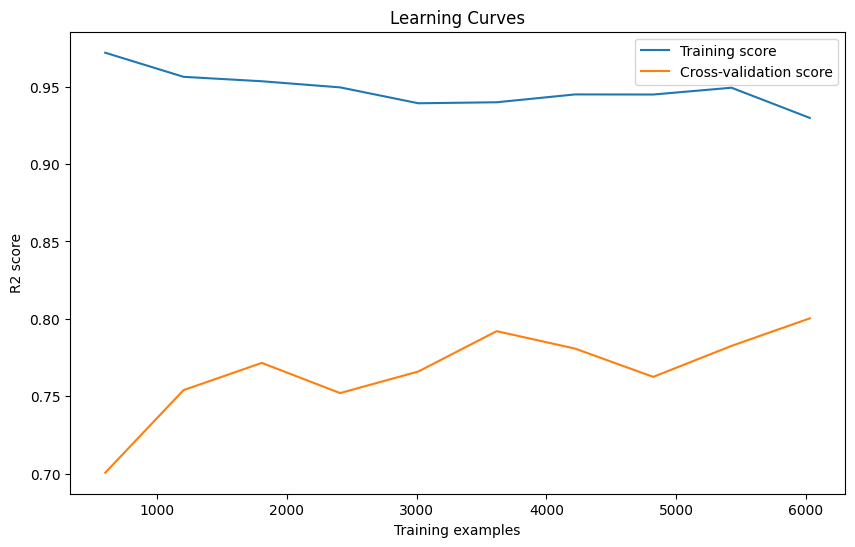

In [86]:

from sklearn.model_selection import learning_curve

def plot_learning_curves(model, X, y):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, scoring='r2',
        train_sizes=np.linspace(0.1, 1.0, 10))
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
    plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Cross-validation score')
    plt.xlabel('Training examples')
    plt.ylabel('R2 score')
    plt.legend()
    plt.title('Learning Curves')
    plt.show()
plot_learning_curves(best_model['model'],X,y)


In [87]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model['model'], X, y, cv=5)
print(f"CV Scores: {cv_scores}")
print(f"CV Mean: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")


CV Scores: [0.79388871 0.66975784 0.78618762 0.9048564  0.84252793]
CV Mean: 0.799 (+/- 0.155)


In [88]:
# Define Global Train-Test Split
X_psq = df.drop(columns=['price','price_per_sqft'])
y_psq = df['price_per_sqft']

X_train, X_test, y_train, y_test = train_test_split(X_psq, y_psq, test_size=0.2, random_state=42)

# Preprocessing Function
def get_preprocessor():
    type_encoder = OrdinalEncoder(categories=[['Apartment', 'Duplex', 'Building']])
    address_vectorizer = TfidfVectorizer(max_features=50)  # Reduced features to speed up training

    preprocessor = ColumnTransformer(
        transformers=[
            ('address_vec', address_vectorizer, 'address'),
            ('type_enc', type_encoder, ['type']),
            ('scaler', StandardScaler(), ['size(sqft)', 'beds', 'bath'])
        ]
    )
    
    return preprocessor

# Model Training Function
def find_best_model():
    preprocessor = get_preprocessor()
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    models = {
        'linear_regression': (LinearRegression(), {}),
        'ridge': (Ridge(), {'regressor__alpha': [0.1, 1.0, 10.0]}),
        'lasso': (Lasso(), {'regressor__alpha': [0.1, 1.0, 10.0]}),
        'random_forest': (RandomForestRegressor(n_jobs=-1, random_state=42), {
            'regressor__n_estimators': [50, 100],  
            'regressor__max_depth': [10, 20]
        }),
        'gradient_boosting': (GradientBoostingRegressor(random_state=42), {
            'regressor__n_estimators': [50, 100],  
            'regressor__learning_rate': [0.05, 0.1]
        }),
        'svr_rbf': (SVR(kernel='rbf'), {
            'regressor__C': [0.1, 1, 10],  
            'regressor__gamma': ['scale', 'auto']  
        }),
        'svr_linear': (SVR(kernel='linear'), {
            'regressor__C': [0.1, 1, 10]  
        })
    }
    
    best_model_info = {'name': None, 'model': None, 'best_params': None, 'r2': -np.inf, 'rmse': np.inf}
    
    for name, (model, params) in models.items():
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('regressor', model)
        ])
        
        if params:
            grid_search = GridSearchCV(pipeline, params, cv=3, scoring='r2', n_jobs=-1)  # cv=3 for speed
            grid_search.fit(X_train, y_train)
            best_model_psq = grid_search.best_estimator_
            best_params = grid_search.best_params_
        else:
            best_model_psq = pipeline
            best_model_psq.fit(X_train, y_train)
            best_params = {}
        
        y_pred = best_model_psq.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mape = mean_absolute_percentage_error(y_test, y_pred)
        accuracy = best_model_psq.score(X_test, y_test)
        
        if r2 > best_model_info['r2']:
            best_model_info = {
                'name': name,
                'model': best_model_psq,
                'best_params': best_params,
                'r2': r2,
                'rmse': rmse,
                'mape': mape,
                'score': accuracy
            }
    
    return best_model_info

# Train & Find Best Model
best_model_psq = find_best_model()
print(f"Best Model: {best_model_psq['name']}")
print(f"R2 Score: {best_model_psq['r2']}")
print(f"RMSE: {best_model_psq['rmse']}")
print(f"Best Parameters: {best_model_psq['best_params']}")
print(f"mape: {best_model_psq['mape']}")
print(f"Accuracy: {best_model_psq['score']*100}")


Best Model: gradient_boosting
R2 Score: 0.643733920218684
RMSE: 6.989699558349099
Best Parameters: {'regressor__learning_rate': 0.1, 'regressor__n_estimators': 100}
mape: 0.1737683425744457
Accuracy: 64.3733920218684


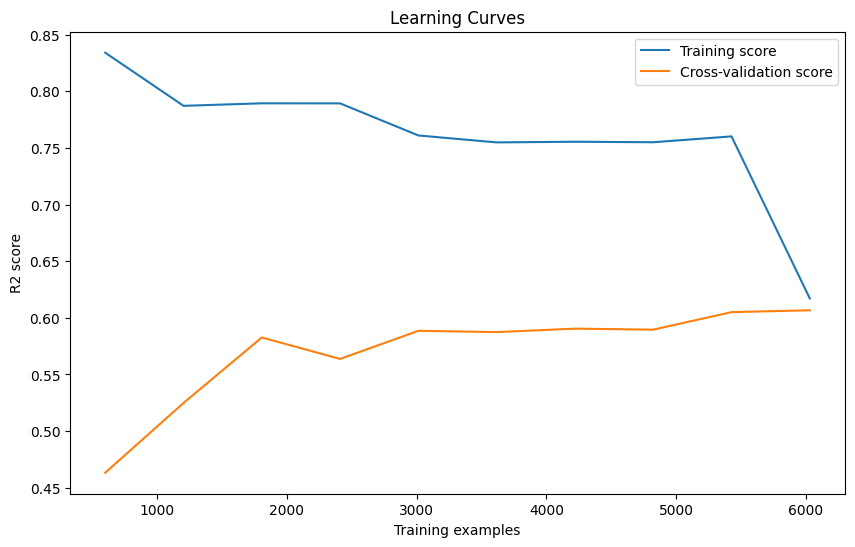

In [89]:
plot_learning_curves(best_model_psq['model'],X_psq,y_psq)


In [90]:
# Define Global Train-Test Split
X_psq1 = df.drop(columns=['price'])
y_psq1 = df['price']

X_train, X_test, y_train, y_test = train_test_split(X_psq1, y_psq1, test_size=0.2, random_state=42)

# Preprocessing Function
def get_preprocessor():
    type_encoder = OrdinalEncoder(categories=[['Apartment', 'Duplex', 'Building']])
    address_vectorizer = TfidfVectorizer(max_features=50)  # Reduced features to speed up training

    preprocessor = ColumnTransformer(
        transformers=[
            ('address_vec', address_vectorizer, 'address'),
            ('type_enc', type_encoder, ['type']),
            ('scaler', StandardScaler(), ['size(sqft)', 'beds', 'bath','price_per_sqft','beds_to_baths_ratio'])
        ]
    )
    
    return preprocessor

# Model Training Function
def find_best_model():
    preprocessor = get_preprocessor()
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    models = {
        'linear_regression': (LinearRegression(), {}),
        'ridge': (Ridge(), {'regressor__alpha': [0.1, 1.0, 10.0]}),
        'lasso': (Lasso(), {'regressor__alpha': [0.1, 1.0, 10.0]}),
        'random_forest': (RandomForestRegressor(n_jobs=-1, random_state=42), {
            'regressor__n_estimators': [50, 100],  
            'regressor__max_depth': [10, 20]
        }),
        'gradient_boosting': (GradientBoostingRegressor(random_state=42), {
            'regressor__n_estimators': [50, 100],  
            'regressor__learning_rate': [0.05, 0.1]
        }),
        'svr_rbf': (SVR(kernel='rbf'), {
            'regressor__C': [0.1, 1, 10],  
            'regressor__gamma': ['scale', 'auto']  
        }),
        'svr_linear': (SVR(kernel='linear'), {
            'regressor__C': [0.1, 1, 10]  
        })
    }
    
    best_model_info = {'name': None, 'model': None, 'best_params': None, 'r2': -np.inf, 'rmse': np.inf}
    
    for name, (model, params) in models.items():
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('regressor', model)
        ])
        
        if params:
            grid_search = GridSearchCV(pipeline, params, cv=3, scoring='r2', n_jobs=-1)  # cv=3 for speed
            grid_search.fit(X_train, y_train)
            best_model_psq1 = grid_search.best_estimator_
            best_params = grid_search.best_params_
        else:
            best_model_psq1 = pipeline
            best_model_psq1.fit(X_train, y_train)
            best_params = {}
        
        y_pred = best_model_psq1.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mape = mean_absolute_percentage_error(y_test, y_pred)
        accuracy = best_model_psq1.score(X_test, y_test)
        
        if r2 > best_model_info['r2']:
            best_model_info = {
                'name': name,
                'model': best_model_psq1,
                'best_params': best_params,
                'r2': r2,
                'rmse': rmse,
                'mape': mape,
                'score': accuracy
            }
    
    return best_model_info

# Train & Find Best Model
best_model_psq1 = find_best_model()
print(f"Best Model: {best_model_psq1['name']}")
print(f"R2 Score: {best_model_psq1['r2']}")
print(f"RMSE: {best_model_psq1['rmse']}")
print(f"Best Parameters: {best_model_psq1['best_params']}")
print(f"mape: {best_model_psq1['mape']}")
print(f"Accuracy: {best_model_psq1['score']*100}")


Best Model: ridge
R2 Score: 0.9206209191588022
RMSE: 20800.87722480492
Best Parameters: {'regressor__alpha': 10.0}
mape: 0.29603300505065394
Accuracy: 92.06209191588022


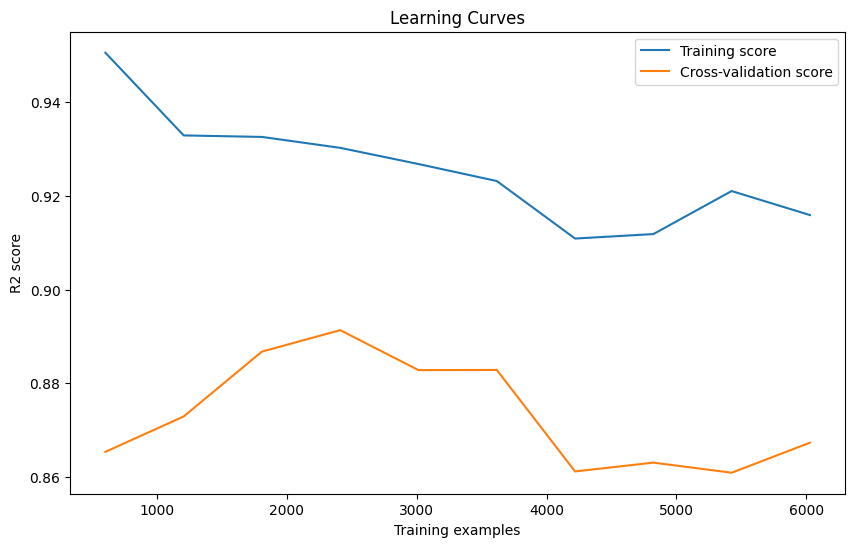

In [91]:
plot_learning_curves(best_model_psq1['model'],X_psq1,y_psq1)


In [92]:
# Define Global Train-Test Split
X_psq2 = df.drop(columns=['price','price_per_sqft'])
y_psq2 = df['price_per_sqft']

X_train, X_test, y_train, y_test = train_test_split(X_psq2, y_psq2, test_size=0.2, random_state=42)

# Preprocessing Function
def get_preprocessor():
    type_encoder = OrdinalEncoder(categories=[['Apartment', 'Duplex', 'Building']])
    address_vectorizer = TfidfVectorizer(max_features=50)  # Reduced features to speed up training

    preprocessor = ColumnTransformer(
        transformers=[
            ('address_vec', address_vectorizer, 'address'),
            ('type_enc', type_encoder, ['type']),
            ('scaler', StandardScaler(), ['size(sqft)', 'beds', 'bath','beds_to_baths_ratio'])
        ]
    )
    
    return preprocessor

# Model Training Function
def find_best_model():
    preprocessor = get_preprocessor()
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    models = {
        'linear_regression': (LinearRegression(), {}),
        'ridge': (Ridge(), {'regressor__alpha': [0.1, 1.0, 10.0]}),
        'lasso': (Lasso(), {'regressor__alpha': [0.1, 1.0, 10.0]}),
        'random_forest': (RandomForestRegressor(n_jobs=-1, random_state=42), {
            'regressor__n_estimators': [50, 100],  
            'regressor__max_depth': [10, 20]
        }),
        'gradient_boosting': (GradientBoostingRegressor(random_state=42), {
            'regressor__n_estimators': [50, 100],  
            'regressor__learning_rate': [0.05, 0.1]
        }),
        'svr_rbf': (SVR(kernel='rbf'), {
            'regressor__C': [0.1, 1, 10],  
            'regressor__gamma': ['scale', 'auto']  
        }),
        'svr_linear': (SVR(kernel='linear'), {
            'regressor__C': [0.1, 1, 10]  
        })
    }
    
    best_model_info = {'name': None, 'model': None, 'best_params': None, 'r2': -np.inf, 'rmse': np.inf}
    
    for name, (model, params) in models.items():
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('regressor', model)
        ])
        
        if params:
            grid_search = GridSearchCV(pipeline, params, cv=3, scoring='r2', n_jobs=-1)  # cv=3 for speed
            grid_search.fit(X_train, y_train)
            best_model_psq = grid_search.best_estimator_
            best_params = grid_search.best_params_
        else:
            best_model_psq2 = pipeline
            best_model_psq2.fit(X_train, y_train)
            best_params = {}
        
        y_pred = best_model_psq2.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mape = mean_absolute_percentage_error(y_test, y_pred)
        accuracy = best_model_psq2.score(X_test, y_test)
        
        if r2 > best_model_info['r2']:
            best_model_info = {
                'name': name,
                'model': best_model_psq2,
                'best_params': best_params,
                'r2': r2,
                'rmse': rmse,
                'mape': mape,
                'score': accuracy
            }
    
    return best_model_info

# Train & Find Best Model
best_model_psq2 = find_best_model()
print(f"Best Model: {best_model_psq2['name']}")
print(f"R2 Score: {best_model_psq2['r2']}")
print(f"RMSE: {best_model_psq2['rmse']}")
print(f"Best Parameters: {best_model_psq2['best_params']}")
print(f"mape: {best_model_psq2['mape']}")
print(f"Accuracy: {best_model_psq2['score']*100}")


Best Model: linear_regression
R2 Score: 0.5689930246280615
RMSE: 7.688000812504489
Best Parameters: {}
mape: 0.19707572785919858
Accuracy: 56.89930246280615


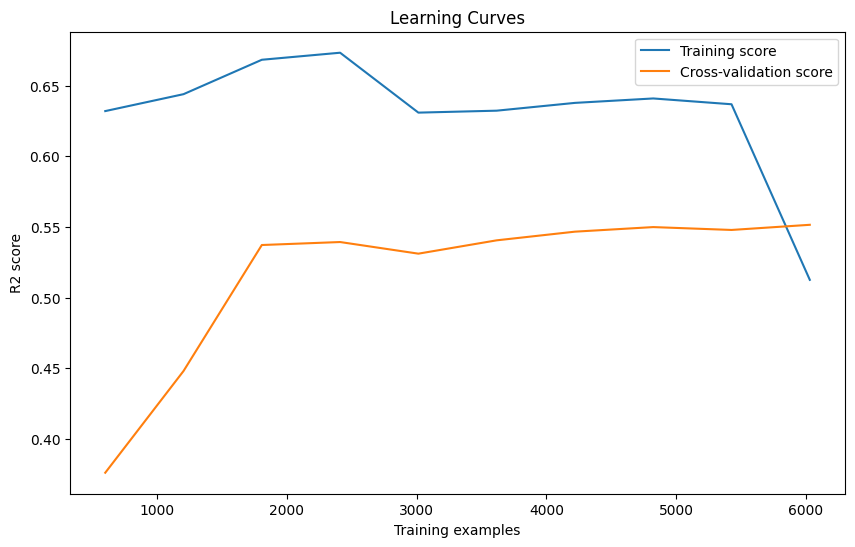

In [93]:
plot_learning_curves(best_model_psq2['model'],X_psq2,y_psq2)
